<a href="https://colab.research.google.com/github/Acch123/Competition/blob/main/Data_Claus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'inter-uni-datathon-2024-vic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F84929%2F9589701%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T013202Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D262bed92699e7f950c0380c5ed8e90ec83fc62ef183f8e2bed2115dcf83e87a5a1633e2858c7f2da61ad2377beb747c52f0d4947a73f940f98578ec3b8c2bb548b7e215b327a90c1004b399cfd53915b1ad7c0cfbd9489970e920d8ca5f3929068f9f0321187c206232902fbb94d089a70c2fb93a4b8205040aad661cadcaf8e51bdd05b194ed4581ddb9dc8c41b26fefc5b2f9cf07df47b999b8d8f0ea596eb04e4390036a5d8063b57d222176bcde9f05062fdac14c07cfea1f735c21f18b3239e1209499847fc958b9c18681e506c72bedbb0d642119ecea689ea39e62dcefe8416618b295fbe4c185af4fc633c56a8eed23990f5ede86fbef67228ef7bce'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1063484 bytes downloaded
Downloaded and uncompressed: inter-uni-datathon-2024-vic
Data source import complete.


In [ ]:
# %% [code] {"execution":{"iopub.status.busy":"2024-09-14T01:25:33.780263Z","iopub.execute_input":"2024-09-14T01:25:33.780714Z","iopub.status.idle":"2024-09-14T01:25:34.230223Z","shell.execute_reply.started":"2024-09-14T01:25:33.780668Z","shell.execute_reply":"2024-09-14T01:25:34.228940Z"}}
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %% [code] {"execution":{"iopub.status.busy":"2024-09-14T01:26:03.437762Z","iopub.execute_input":"2024-09-14T01:26:03.438201Z","iopub.status.idle":"2024-09-14T01:26:03.537573Z","shell.execute_reply.started":"2024-09-14T01:26:03.438157Z","shell.execute_reply":"2024-09-14T01:26:03.536389Z"}}
#import test.csv

df = pd.read_csv('/kaggle/input/inter-uni-datathon-2024-vic/test.csv')
print("save_testt")

# %% [code]


/kaggle/input/inter-uni-datathon-2024-vic/test.csv
/kaggle/input/inter-uni-datathon-2024-vic/train.csv
/kaggle/input/inter-uni-datathon-2024-vic/sample_submission.csv
save_testt


# Data Cleaning

In [ ]:
# read dataset
df_test = pd.read_csv('/kaggle/input/inter-uni-datathon-2024-vic/test.csv')
df_train = pd.read_csv('/kaggle/input/inter-uni-datathon-2024-vic/train.csv')
df_submission = pd.read_csv('/kaggle/input/inter-uni-datathon-2024-vic/sample_submission.csv')

In [ ]:
"""Cleaning functions"""
# Clean Income / Expenditure / TransactionAmount / GiftsTransaction
AED_to_AUD = 0.41
GBP_to_AUD = 1.66
JPY_to_AUD = 0.011
EUR_to_AUD = 1.66
AUD_to_AUD = 1

conversion_rates = {
    'AUD': AUD_to_AUD,
    'AED': AED_to_AUD,
    'GBP': GBP_to_AUD,
    'EUR': EUR_to_AUD,
    'JPY': JPY_to_AUD
}

def extract_currency_and_value(value):
    # Pattern 1: Number followed by currency code (e.g., '53376.26 AUD')
    match1 = re.match(r'(\d+\.?\d*)\s*([A-Za-z]+)', value)

    # Pattern 2: Currency symbol followed by a number (e.g., 'AU$ 67484.59')
    match2 = re.match(r'([A-Za-z\$€¥£]+)\s*(\d+\.?\d*)', value)

    # Handle both patterns
    if match1:
        return match1.group(2), round(float(match1.group(1)), 2)  # Currency, Numeric Value
    elif match2:
        return match2.group(1), round(float(match2.group(2)), 2)  # Currency, Numeric Value
    else:
        return 'Unknown', value  # Return 'Unknown' for unidentified patterns

def clean_currency(value):
    if value in ['AUD', 'AU$']:
        return 'AUD'
    elif value == 'AED':
        return 'AED'
    elif value in ['£', 'GBP', 'Â£']:
        return 'GBP'
    elif value == '€':
        return 'EUR'
    elif value == '¥':
        return 'JPY'
    else:
        return 'Unknown'  # You can handle unexpected values here if needed

def adjust_value(row, currency_col, value_col, conversion_rates):
    currency = row[currency_col]
    value = row[value_col]

    if currency in conversion_rates:
        return round(value * conversion_rates[currency], 2)
    else:
        return round(value, 2)  # Handle unknown currencies (optional)

# Clean device type
def clean_device_type(value):
    # Normalize  values
    value = value.lower()  # Convert to lowercase to handle case differences
    if value in ['iphone 15','android','smartphone', 'mob', 'galaxys7', 'mobile']:
        return 'Mobile'
    elif value in ['tablet']:
      return 'Tablet'
    elif value in ['desktop', 'laptop']:
        return 'Desktop'
    else:
        return None  # Return None for values that do not fit either category (optional)

# Clean Country
def clean_transaction_location(value):
    # Normalize country values
    value = value.lower().strip()  # Convert to lowercase to handle case differences
    if value in ['mlb', 'mel', 'melb', 'melbourne', 'melburn']:
        return 'Melbourne'
    elif value in ['syd', 'sydney']:
        return 'Sydney'
    elif value in ['hobart', 'hbt']:
        return 'Hobart'
    elif value in ['bne', 'brisbane']:
        return 'Brisbane'
    elif value in ['perth', 'pth']:
        return 'Perth'
    elif value in ['adelaide city', 'adelaide', 'adl']:
        return 'Adelaide'
    elif value in ['canberra', 'cbr']:
        return 'Canberra'
    elif value in ['darwin', 'drw']:
        return 'Darwin'
    else:
        return None  # Return None for values that do not fit any category (optional)

# Clean Gender
def clean_gender(value):
    # Normalize gender values
    value = value.lower()  # Convert to lowercase to handle case differences
    if value in ['male', 'he', 'man', 'isnotfemale']:
        return 'Male'
    elif value in ['female', 'she', 'fem', 'woman', 'isnotmale']:
        return 'Female'
    else:
        return None  # Return None for values that do not fit either category (optional)

# Create a extracting function to extract the domain name out of the email address
def extract_domain_name(value):
    # Normalize gender values
    value = value.lower().split('@')  # Convert to lowercase to handle case differences and split value based on '@'
    return value[1]  # Returns the domain name of the email

# Create a time translation functioning to standarize time to 24 hour HH:MM:SS format
def translate_time(value):
    if "PM" in value:
        hour, minute, second = (value[:8]).split(":")
        # Handle edge case for 12 PM
        if int(hour) != 12:
            new_hour = int(hour) + 12
        else:
            new_hour = hour  # Keep as 12 for 12 PM (no need to add)
        return f"{new_hour}:{minute}:{second}"
    elif "AM" in value:
        return value[:8]
    # Reformat if time's original format is HH/MM/SS
    if value[2] == "/":
        hour, minute, second = value.split("/")
        return f"{hour}:{minute}:{second}"
    else:
        return value

# Clean up age column
def clean_age(value):
    int_value = int(value)

    if int_value >= 10000:
        return int_value // 1000
    else:
        return int_value

In [ ]:
"""Clean train dataset"""
# Clean $$-related columns
for col in ['Income', 'Expenditure', 'TransactionAmount', 'GiftsTransaction']:
    df_train[[f'Curr_{col}', f'Num_{col}']] = df_train[col].apply(lambda x: pd.Series(extract_currency_and_value(x)))
# Clean currency columns
for col in ['Curr_Income', 'Curr_Expenditure', 'Curr_TransactionAmount', 'Curr_GiftsTransaction']:
    df_train[col] = df_train[col].apply(clean_currency)
# Apply adjustment function to numeric columns
df_train['Income'] = df_train.apply(lambda row: adjust_value(row, 'Curr_Income', 'Num_Income', conversion_rates), axis=1)
df_train['Expenditure'] = df_train.apply(lambda row: adjust_value(row, 'Curr_Expenditure', 'Num_Expenditure', conversion_rates), axis=1)
df_train['TransactionAmount'] = df_train.apply(lambda row: adjust_value(row, 'Curr_TransactionAmount', 'Num_TransactionAmount', conversion_rates), axis=1)
df_train['GiftsTransaction'] = df_train.apply(lambda row: adjust_value(row, 'Curr_GiftsTransaction', 'Num_GiftsTransaction', conversion_rates), axis=1)
# Drop intermediate columns if needed
df_train = df_train.drop(columns=['Num_Income', 'Num_Expenditure', 'Num_TransactionAmount', 'Num_GiftsTransaction'])

# Apply the mapping function to the 'DeviceType' column
df_train['DeviceType'] = df_train['DeviceType'].apply(clean_device_type)

# Apply the mapping function to the 'TransactionLocation' column
df_train['TransactionLocation'] = df_train['TransactionLocation'].apply(clean_transaction_location)

# Apply the mapping function to the 'gender' column
df_train['Gender'] = df_train['Gender'].apply(clean_gender)

# Apply the mapping function to the 'TransactionTime' column
df_train['TransactionTime'] = df_train['TransactionTime'].apply(translate_time)
# Turning 'TransactionTime' is in HH:MM:SS format
df_train['TransactionTime'] = pd.to_datetime(df_train['TransactionTime'], format='%H:%M:%S')
# Extract hour, minute, and second
df_train['Hour'] = df_train['TransactionTime'].dt.hour
df_train['Minute'] = df_train['TransactionTime'].dt.minute
df_train['Second'] = df_train['TransactionTime'].dt.second
# Drop the original 'TransactionTime' column
df_train = df_train.drop(columns=['TransactionTime'])

# Convert 'TransactionDate' column to datetime for one-hot encoding
df_train['TransactionDate'] = pd.to_datetime(df_train['TransactionDate'], format='%Y-%m-%d')
df_train['Year'] = df_train['TransactionDate'].dt.year
df_train['Month'] = df_train['TransactionDate'].dt.month
df_train['Day'] = df_train['TransactionDate'].dt.day
df_train['DayOfWeek'] = df_train['TransactionDate'].dt.dayofweek
# Drop the original 'TransactionDate' column
df_train = df_train.drop(columns=['TransactionDate'])

# Create the new column 'DomainName'
df_train['DomainName'] = df_train['EmailDomain'].apply(extract_domain_name)
# Insert 'DomainName' column right after 'EmailDomain'
# Get the index of the 'EmailDomain' column
email_domain_index = df_train.columns.get_loc('EmailDomain')
# Use insert() to place 'DomainName' after 'EmailDomain'
df_train.insert(email_domain_index + 1, 'DomainName', df_train.pop('DomainName'))

In [ ]:
"""Clean test dataset"""
# Clean $$-related columns
for col in ['Income', 'Expenditure', 'TransactionAmount', 'GiftsTransaction']:
    df_test[[f'Curr_{col}', f'Num_{col}']] = df_test[col].apply(lambda x: pd.Series(extract_currency_and_value(x)))
# Clean currency columns
for col in ['Curr_Income', 'Curr_Expenditure', 'Curr_TransactionAmount', 'Curr_GiftsTransaction']:
    df_test[col] = df_test[col].apply(clean_currency)
# Apply adjustment function to numeric columns
df_test['Income'] = df_test.apply(lambda row: adjust_value(row, 'Curr_Income', 'Num_Income', conversion_rates), axis=1)
df_test['Expenditure'] = df_test.apply(lambda row: adjust_value(row, 'Curr_Expenditure', 'Num_Expenditure', conversion_rates), axis=1)
df_test['TransactionAmount'] = df_test.apply(lambda row: adjust_value(row, 'Curr_TransactionAmount', 'Num_TransactionAmount', conversion_rates), axis=1)
df_test['GiftsTransaction'] = df_test.apply(lambda row: adjust_value(row, 'Curr_GiftsTransaction', 'Num_GiftsTransaction', conversion_rates), axis=1)
# Drop intermediate columns if needed
df_test = df_test.drop(columns=['Num_Income', 'Num_Expenditure', 'Num_TransactionAmount', 'Num_GiftsTransaction'])

# Apply the mapping function to the 'DeviceType' column
df_test['DeviceType'] = df_test['DeviceType'].apply(clean_device_type)

# Apply the mapping function to the 'TransactionLocation' column
df_test['TransactionLocation'] = df_test['TransactionLocation'].apply(clean_transaction_location)

# Apply the mapping function to the 'gender' column
df_test['Gender'] = df_test['Gender'].apply(clean_gender)

# Apply the mapping function to the 'TransactionTime' column
df_test['TransactionTime'] = df_test['TransactionTime'].apply(translate_time)
# Turning 'TransactionTime' is in HH:MM:SS format
df_test['TransactionTime'] = pd.to_datetime(df_test['TransactionTime'], format='%H:%M:%S')
# Extract hour, minute, and second
df_test['Hour'] = df_test['TransactionTime'].dt.hour
df_test['Minute'] = df_test['TransactionTime'].dt.minute
df_test['Second'] = df_test['TransactionTime'].dt.second
# Drop the original 'TransactionTime' column
df_test = df_test.drop(columns=['TransactionTime'])

# Convert 'TransactionDate' column to datetime for one-hot encoding
df_test['TransactionDate'] = pd.to_datetime(df_test['TransactionDate'], format='%Y-%m-%d')
df_test['Year'] = df_test['TransactionDate'].dt.year
df_test['Month'] = df_test['TransactionDate'].dt.month
df_test['Day'] = df_test['TransactionDate'].dt.day
df_test['DayOfWeek'] = df_test['TransactionDate'].dt.dayofweek
# Drop the original 'TransactionDate' column
df_test = df_test.drop(columns=['TransactionDate'])

# Create the new column 'DomainName'
df_test['DomainName'] = df_test['EmailDomain'].apply(extract_domain_name)
# Insert 'DomainName' column right after 'EmailDomain'
# Get the index of the 'EmailDomain' column
email_domain_index = df_test.columns.get_loc('EmailDomain')
# Use insert() to place 'DomainName' after 'EmailDomain'
df_test.insert(email_domain_index + 1, 'DomainName', df_test.pop('DomainName'))

In [ ]:
# save dataframe as csv
df_train.to_csv('cleaned_df_train.csv', index=False)
df_test.to_csv('cleaned_df_test.csv', index=False)

# Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

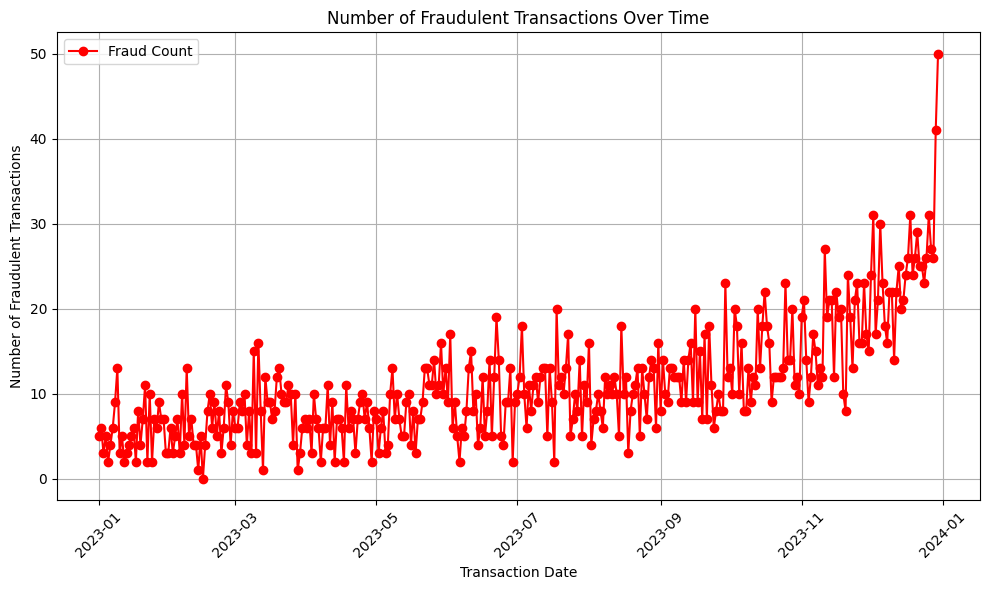

In [ ]:
# Assuming df_train is the DataFrame and it has 'TransactionDate' and 'IsFraud' columns.
# Step 1: Convert 'TransactionDate' to datetime format if not already done
df_train['TransactionDate'] = pd.to_datetime(df_train['TransactionDate'])

# Step 2: Group by date and sum up the frauds per day
fraud_by_date = df_train.groupby(df_train['TransactionDate'].dt.date)['IsFraud'].sum()

# Step 3: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_date.index, fraud_by_date.values, marker='o', linestyle='-', color='r', label='Fraud Count')
plt.title('Number of Fraudulent Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Calculate the count of fraud and non-fraud cases
fraud_counts = df_train['IsFraud'].value_counts()

# Calculate the proportion of fraud and non-fraud
fraud_proportion = fraud_counts / fraud_counts.sum()

print(fraud_proportion)


IsFraud
0    0.635692
1    0.364308
Name: count, dtype: float64


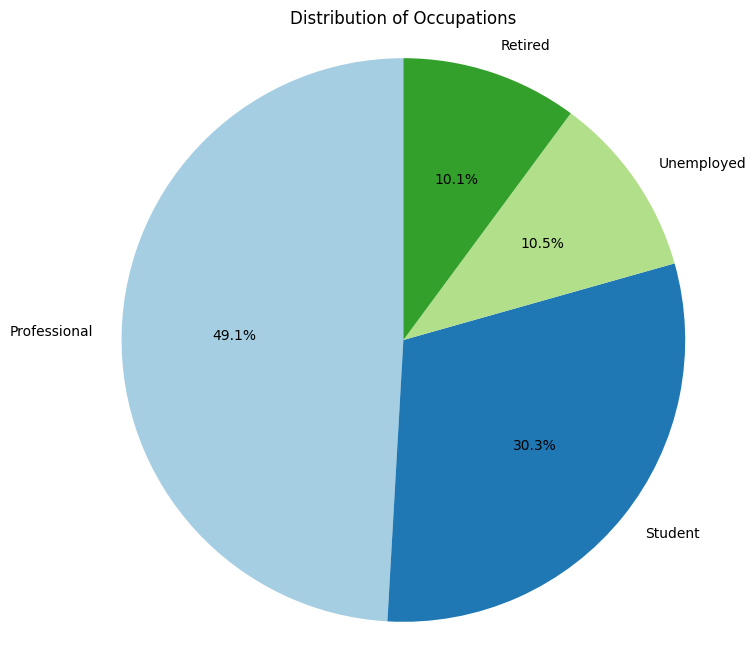

In [ ]:
# Assuming df_train contains the 'Occupation' column

# Step 1: Count the occurrences of each unique value in the 'Occupation' column
occupation_counts = df_train['Occupation'].value_counts()

# Step 2: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Step 3: Set the title and display the chart
plt.title('Distribution of Occupations')
plt.axis('equal')  # Ensures that pie is drawn as a circle
plt.show()


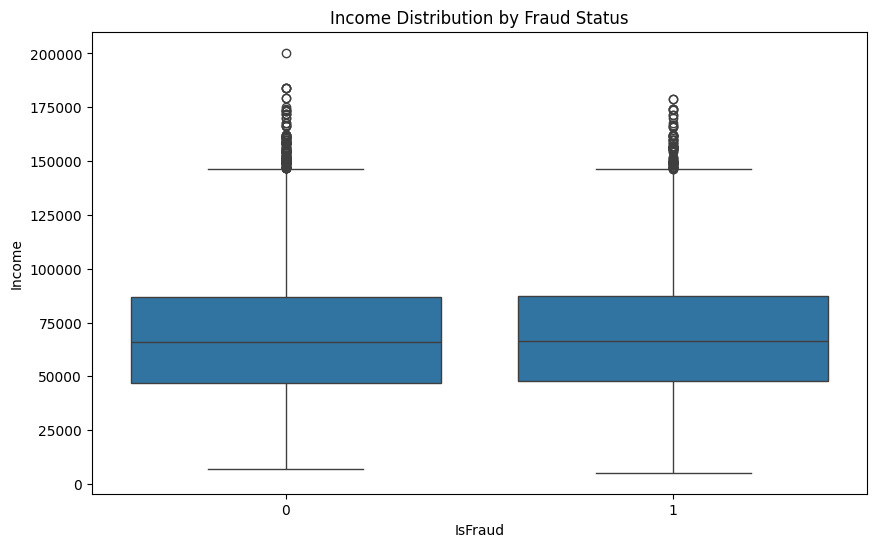

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Income', data=df_train)
plt.title('Income Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Income')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 15))

# graph 1
ax1 = fig.add_subplot(221)
cm = np.array([[1364, 4], [6, 820]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# graph 2
ax2 = fig.add_subplot(222)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'OOB Score']
values = [0.9954, 0.9951, 0.9927, 0.9939, 0.9925]
sns.barplot(x=metrics, y=values, ax=ax2)
ax2.set_title('Model Performance Metrics')
ax2.set_ylim(0.99, 1)
for i, v in enumerate(values):
    ax2.text(i, v, f'{v:.4f}', ha='center', va='bottom')

# graph 3
ax3 = fig.add_subplot(223)
folds = range(1, 11)
f1_scores = [0.9892, 0.9864, 0.9892, 0.9919, 0.9883, 0.9910, 0.9973, 0.9910, 0.9982, 0.9964]
sns.lineplot(x=folds, y=f1_scores, marker='o', ax=ax3)
ax3.set_title('Cross-Validation F1 Scores')
ax3.set_xlabel('Fold')
ax3.set_ylabel('F1 Score')
ax3.set_ylim(0.985, 1)

# graph 4
ax4 = fig.add_subplot(224)
fold7_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fold7_values = [0.9973, 0.9947, 1.0000, 0.9973]
sns.barplot(x=fold7_metrics, y=fold7_values, ax=ax4)
ax4.set_title('Fold 7 Performance Metrics')
ax4.set_ylim(0.99, 1.001)
for i, v in enumerate(fold7_values):
    ax4.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()

#Modelling

In [ ]:
#restore data if necessary
df_test = temp_test_df
df_train = temp_train_df

In [ ]:
import numpy as np
import pandas as pd
import re
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

label_encoder = LabelEncoder()

# Hot encoding

# List DataFrame
df_domain = pd.DataFrame({
    'DomainName': ['disposable.com', 'gmail.com', 'tempmail.com', 'outlook.com', 'yahoo.com', 'securemail.com']
})

df_device = pd.DataFrame({
    'DeviceType': ['Mobile', 'Tablet', 'Desktop']
})

df_transaction_location = pd.DataFrame({
    'TransactionLocation': ['Adelaide', 'Canberra', 'Brisbane', 'Darwin', 'Melbourne', 'Sydney', 'Hobart', 'Perth']
})

df_marital_status = pd.DataFrame({
    'MaritalStatus': ['Widowed', 'Married', 'Single', 'Divorced']
})

df_gender = pd.DataFrame({
    'Gender': ['Male', 'Female']
})

df_occupation = pd.DataFrame({
    'Occupation': ['Student', 'Unemployed', 'Professional', 'Retired']
})

df_transaction_type = pd.DataFrame({
    'TransactionType': ['Withdrawal', 'Purchase', 'Payment', 'Transfer']
})

df_education_level = pd.DataFrame({
    'EducationLevel': ['Bachelor', 'High School', 'Master', 'PhD']
})

df_merchant_id = pd.DataFrame({
    'MerchantID': ['M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007', 'M008']
})

# One-Hot Encoding all multi-categorical column for logistics regression

df_train = pd.get_dummies(df_train, columns=['Occupation',
                                             'EducationLevel',
                                             'MaritalStatus',
                                             'DomainName',
                                             'DeviceType',
                                             'Curr_Income',
                                             'Curr_Expenditure',
                                             'Curr_TransactionAmount',
                                             'Curr_GiftsTransaction',
                                             'TransactionLocation',
                                             'TransactionType',
                                             'MerchantID'])

# Label Encoding for binary columns
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# Create a flag for missing Latitude/Longitude
df_train['Lat_Long_Missing'] = df_train[['Latitude', 'Longitude']].isnull().any(axis=1).astype(int)

# Impute missing values with the median for Latitude and Longitude
#imputer = SimpleImputer(strategy='median')
#df_train[['Latitude', 'Longitude']] = imputer.fit_transform(df_train[['Latitude', 'Longitude']])

# df_train = df_train.dropna(subset=['Latitude', 'Longitude'])
# Dropping latitude and longitude reduces result to:
#oob_score:  0.9926756694895857
#0.9922196796338673


# Move 'IsFraud' column to the end
# Step 1: Remove the 'IsFraud' column from its current position
is_fraud_column = df_train.pop('IsFraud')

# Step 2: Insert the 'IsFraud' column at the end of the DataFrame
df_train['IsFraud'] = is_fraud_column

# Drop non-target variable
non_numeric_columns = df_train.select_dtypes(include=['object']).columns
df_train = df_train.drop(columns=non_numeric_columns)
df_train = df_train.drop(columns=['Latitude', 'Longitude']) # drop has in inrease of 0.0006 F-1 score

# Random Forest

X = df_train.iloc[:,0:-1]
y = df_train.iloc[:,-1]

# Assume df_train has already been preprocessed and 'IsFraud' is the target column
X = df_train.drop('IsFraud', axis=1)  # All features except 'IsFraud'
y = df_train['IsFraud']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(oob_score=True, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Print the out-of-bag score
print("Out-of-bag score:", rf.oob_score_)

# Get predicted probabilities instead of binary predictions
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class ('IsFraud')

# Set a custom threshold for predicting fraud
threshold = 0.4  # You can adjust this value
y_pred_custom_threshold = (y_pred_prob >= threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom_threshold)
precision_custom = precision_score(y_test, y_pred_custom_threshold)
recall_custom = recall_score(y_test, y_pred_custom_threshold)
f1_custom = f1_score(y_test, y_pred_custom_threshold)
cm_custom = confusion_matrix(y_test, y_pred_custom_threshold)

# Print evaluation metrics with custom threshold
print(f"Custom Threshold: {threshold}")
print(f"Accuracy: {accuracy_custom}")
print(f"Precision: {precision_custom}")
print(f"Recall: {recall_custom}")
print(f"F1 Score: {f1_custom}")
print(f"Confusion Matrix:\n{cm_custom}")


# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

Out-of-bag score: 0.9935020519835841
Custom Threshold: 0.4
Accuracy: 0.995897903372835
Precision: 0.9987789987789988
Recall: 0.9903147699757869
F1 Score: 0.9945288753799393
Confusion Matrix:
[[1367    1]
 [   8  818]]


In [ ]:
# One-hot encoding on the same categorical columns
df_test = pd.get_dummies(df_test, columns=['Occupation',
                                           'EducationLevel',
                                           'MaritalStatus',
                                           'DomainName',
                                           'DeviceType',
                                           'Curr_Income',
                                           'Curr_Expenditure',
                                           'Curr_TransactionAmount',
                                           'Curr_GiftsTransaction',
                                           'TransactionLocation',
                                           'TransactionType',
                                           'MerchantID'])

missing_cols = set(X_train.columns) - set(df_test.columns)
# Add missing columns to the test data and fill with 0 (or any appropriate value)
for col in missing_cols:
    df_test[col] = 0

# Ensure the test data columns are in the same order as the training data
df_test = df_test[X_train.columns]

# Label encoding for 'Gender'
df_test['Gender'] = label_encoder.transform(df_test['Gender'])  # Use the same encoder as for training data

# Create a flag for missing Latitude/Longitude
#df_test['Lat_Long_Missing'] = df_test[['Latitude', 'Longitude']].isnull().any(axis=1).astype(int)

# Impute missing Latitude and Longitude (same strategy as before)
#imputer = SimpleImputer(strategy='median')
#df_test[['Latitude', 'Longitude']] = imputer.transform(df_test[['Latitude', 'Longitude']])

# Drop non-numeric columns if necessary (same as in training)
non_numeric_columns_test = df_test.select_dtypes(include=['object']).columns
df_test = df_test.drop(columns=non_numeric_columns_test)
#df_test = df_test.drop(columns=['Latitude', 'Longitude'])

# Assuming the model has already been trained, make predictions on the test data
y_test_pred_prob = rf.predict_proba(df_test)[:, 1]  # Probabilities for the positive class ('IsFraud')

# Use the same custom threshold to classify as fraud or not
threshold = 0.4  # Same as the threshold you used before
y_test_pred = (y_test_pred_prob >= threshold).astype(int)

# Print predicted values (0 for non-fraud, 1 for fraud)
print("Predictions on test data:", y_test_pred)

# Load the saved model using pickle
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Now you can use the loaded model to make predictions on the test data
y_test_pred_prob = loaded_rf_model.predict_proba(df_test)[:, 1]
y_test_pred = (y_test_pred_prob >= threshold).astype(int)

Predictions on test data: [0 0 0 ... 0 0 0]


In [ ]:
# Step 1: Add the predictions to the test DataFrame
df_test['IsFraud'] = y_test_pred  # Add the predicted 'isFraud' values as a new column

# Step 2: Select only the 'transaction number' and 'isFraud' columns
result_df = df_test[['TransactionNumber', 'IsFraud']]

# Step 3: Sort the DataFrame by 'transaction number' in ascending order
result_df_sorted = result_df.sort_values(by='TransactionNumber', ascending=True)

# Step 4: Save the sorted result to a CSV file
result_df_sorted.to_csv('submission.csv', index=False)

print("Results saved to 'submission.csv'")


Results saved to 'submission.csv'


## Thank you